In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

# Amount of data per class - for example, 5 for train + original + 2 for test
#       = 8 images in total
TRAIN_AMOUNT = 200
TEST_AMOUNT = 100
GENERATED_COUNT = TRAIN_AMOUNT + TEST_AMOUNT - 1

RANDOM_CHANCE = 0.05
SIZE = 5

In [26]:
def show_image(img, show=True):
    plt.imshow(img, cmap='gray', vmin=-1, vmax=+1)
    if show:
        plt.show()

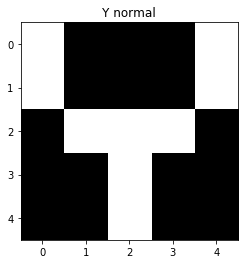

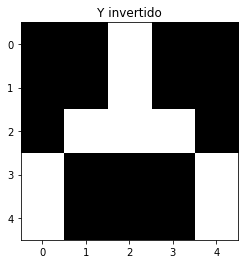

In [27]:
base_y = np.array([[+1, -1, -1, -1, +1],
          [+1, -1, -1, -1, +1],
          [-1, +1, +1, +1, -1],
          [-1, -1, +1, -1, -1],
          [-1, -1, +1, -1, -1]])

inverted_y = base_y[::-1, :]

plt.title("Y normal")
show_image(base_y, show=False)
plt.savefig("classe_positiva.png")
plt.show()

plt.title("Y invertido")
show_image(inverted_y, show=False)
plt.savefig("classe_negativa.png")
plt.show()

In [20]:
def randomize_img(img, amount=5, random_chance=RANDOM_CHANCE, size=SIZE):
    # Create "amount" variations of a image randomly
    data = []
    for _ in range(amount):
        elements = [-1, +1]
        probabilities = [random_chance, 1-random_chance]
        # Multiply our new image by the random flipping of elements
        data.append(img*np.random.choice(elements, (5,5), p=probabilities))
        
    return data

In [21]:
x, y = [], []

for img, label in zip([base_y, inverted_y], [+1, -1]):
    x += randomize_img(img, GENERATED_COUNT) + [img]
    y += [label]*(GENERATED_COUNT+1)

Y normal


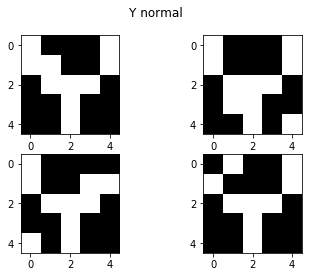

Y invertido


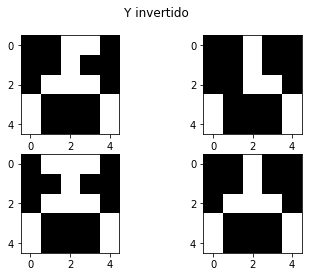

In [22]:
def show_examples(x, title, plot_size=2, figname=""):
    print(title)
    plt.subplots(plot_size, plot_size)
    for i in range(plot_size**2):
        plt.subplot(plot_size, plot_size, i+1)
        show_image(x[i], show=False)
    plt.suptitle(figname)
    plt.savefig(f"varios_{figname.split()[-1]}.png")
     

plt_size = 2
for imgs, label in zip([x[:plt_size**2], x[-plt_size**2:]], ["Y normal", "Y invertido"]):
    show_examples(imgs, label, figname=label)
    plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y),
                                                    stratify=y,
                                                    test_size=0.33)
# Open up the images into a vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(402, 25)
(198, 25)
(402,)
(198,)


In [28]:
class Adaline():
    def __init__(self, use_normal_dist=True):
        if use_normal_dist:
            self.weights = np.random.normal(size=(SIZE*SIZE))
            self.bias = np.random.normal(size=1)
        else:
            self.weights = np.random.rand(SIZE,SIZE)
            self.bias = np.random.rand(1)
        self.lr = 0.1
    
    def fit(self, x_train, y_train, n_iter=100, verbose=False):
        for _ in range(n_iter):   
            output = x_train.dot(self.weights) + self.bias
            
            # Derivate of weights
            dw = self.lr*(x_train.T * (y_train - output)).T
            dw = dw.sum(axis=0) / len(x_train)
            
            # Derivates of bias
            db = self.lr*(y_train - output).sum() / len(x_train)
                        
            # Update
            self.weights = self.weights + dw           
            self.bias = self.bias + db
            
            if verbose:
                print("total loss", (y_train-output).mean(), "\n\n")
    
    def predict(self, x_test):
        output = x_test.dot(self.weights) + self.bias
        
        output[output >= 0] = 1
        output[output < 0] = -1
        return output

In [29]:
model = Adaline()
model.fit(x_train, y_train)

In [30]:
accuracy_score(y_train, model.predict(x_train))

0.9825870646766169

In [31]:
y_preds = model.predict(x_test)

In [32]:
accuracy_score(y_test, y_preds)

0.98989898989899